In [10]:
from modules.utils import sorter, loader, cleaner
from keras import models, layers, optimizers
import matplotlib.pyplot as plt

In [11]:
[cleaner(i) for i in ["train","test","validation"]]

[None, None, None]

In [12]:
sorter(200,100,100)

In [13]:
train = loader("train")
test = loader("test")
val = loader("validation")

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [14]:
model = models.Sequential()

In [15]:
model.add(layers.Conv2D(32,(3,3), activation="relu", input_shape = (150,150,3)))

model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))


In [16]:
model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4),metrics=["acc"])

In [17]:
history = model.fit_generator(
    train,
    steps_per_epoch=2,
    epochs=10,
    validation_data=val,
    validation_steps=10
)

Epoch 1/10
2/2 [==============================] - 3s 1s/step - loss: 7.3479 - acc: 0.4219 - val_loss: 2.0316 - val_acc: 0.5000
Epoch 2/10
2/2 [==============================] - 1s 271ms/step - loss: 3.2690 - acc: 0.5781
Epoch 3/10
2/2 [==============================] - 0s 209ms/step - loss: 2.1481 - acc: 0.6250
Epoch 4/10
2/2 [==============================] - 0s 176ms/step - loss: 1.2791 - acc: 0.6094
Epoch 5/10
2/2 [==============================] - 1s 260ms/step - loss: 2.2245 - acc: 0.5156
Epoch 6/10
2/2 [==============================] - 1s 312ms/step - loss: 1.2731 - acc: 0.6250
Epoch 7/10
2/2 [==============================] - 1s 318ms/step - loss: 1.7091 - acc: 0.5312
Epoch 8/10
2/2 [==============================] - 0s 112ms/step - loss: 1.1376 - acc: 0.5750
Epoch 9/10
2/2 [==============================] - 0s 105ms/step - loss: 1.2769 - acc: 0.5750
Epoch 10/10
2/2 [==============================] - 1s 291ms/step - loss: 0.9499 - acc: 0.6094


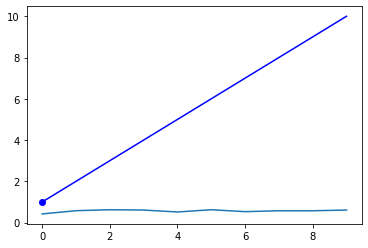

In [18]:
acc = history.history["acc"]
plt.plot(range(1,len(acc)+1),"b",acc)
val_acc = history.history["val_acc"]
plt.plot(range(1,len(val_acc)+1),"bo",val_acc)

plt.show()